# MOVIE RECOMMENDATION SYSTEM PROJECT

**This project aims to develop a recommendation system that provides personalized movie suggestions to users based on their past ratings. The goal is to predict and recommend the top 5 movies that a user is likely to enjoy. The project follows the CRISP-DM framework, involving data preprocessing, exploratory analysis, model selection, and evaluation to deliver accurate and meaningful recommendations.**

## OVERVIEW

In the modern entertainment industry, personalized content recommendations are essential for enhancing user experience and engagement. With the vast number of movies available across various streaming platforms, users often struggle to find content that aligns with their preferences. Effective recommendation systems can help users discover movies they are likely to enjoy, increasing user satisfaction and platform retention.

Movie recommendation systems analyze user behavior, such as past ratings and interactions, to provide tailored suggestions. However, developing an accurate recommendation system poses challenges, including sparse user data, changing preferences, and the need to balance accuracy with diversity. Machine learning techniques, like collaborative filtering and content-based approaches, provide viable solutions to these challenges.

To build a successful recommendation system, a structured approach involving data preprocessing and model selection is necessary. By leveraging insights from the model, streaming platforms can enhance user engagement, improve content discoverability, and drive business growth.


**STAKEHOLDERS**

The stakeholders for this project are a streaming platform aiming to enhance their services and retain viewers by offering personalized recommendations and improving content acquisition strategies. This project will help them achieve that, by analyzing user preferences, identifying popular genres, and optimizing recommendations to increase user engagement and satisfaction.



**PROBLEM STATEMENT**

Users often face difficulties in discovering movies that match their preferences due to the overwhelming number of choices available. This lack of personalized recommendations leads to lower user engagement and potential dissatisfaction with the platform.So, how can we improve user engagement and retention by providing personalized movie recommendations based on their past ratings?


This project aims to develop a collaborative filtering-based recommendation system that provides personalized movie suggestions by analyzing a user's past ratings, thereby improving their overall experience and engagement.



**OBJECTIVES**

- Conduct thorough exploratory data analysis (EDA) to understand user preferences and rating trends.

- Develop a recommendation system that provides personalized movie recommendations based on user ratings.

- Implement collaborative filtering and content-based approaches to improve recommendation accuracy.

- Evaluate the recommendation system using appropriate performance metrics to ensure relevance and accuracy.

- Provide actionable insights to stakeholders to enhance user satisfaction and engagement strategies.



**METRICS OF SUCCESS**

To evaluate the effectiveness of the recommendation system, the following metrics will be used:

- Precision: Measures the proportion of recommended movies in the top 5 results that are relevant to the user.

- Mean Absolute Error (MAE): Quantifies the average magnitude of errors between predicted and actual ratings.

- Root Mean Square Error (RMSE): Provides a measure of prediction accuracy by penalizing larger errors more heavily.



These metrics will ensure the recommendation system is both accurate and effective in providing meaningful movie suggestions to users.

## DATA UNDERSTANDING

This section explores the dataset's source, structure, and contents to ensure its relevance and credibility. We will examine the columns and rows to understand the variables and their significance for building the recommendation system.


**DATA SOURCE:**

The dataset used in this project is sourced from the GroupLens Research team, titled "MovieLens Latest Small Dataset." It is a CSV-based dataset containing user ratings, movie information, and additional features relevant for building a recommendation system. You can access it here: [MovieLens Dataset](https://grouplens.org/datasets/movielens/latest/).

The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`.


Only movies with at least one rating or tag are included in the dataset. Movie ids are consistent between `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv` (i.e., the same id refers to the same movie across these four data files).


All ratings are contained in the file `ratings.csv`. Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


Movie information is contained in the file `movies.csv`. Movie titles include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

### UNDERSTANDING ROWS & COLUMNS IN THE DATASET

In [1]:
#Import the libraries needed for this section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

To focus more on the OOP strategy and less on procedural code we created classes that loads the data from all the datasets, check the general information of the data, the shape of the dataset, and prints out the first 5 rows for preview.

In [2]:
# LOAD THE DATASETS, GET THE SHAPE OF THE DATASET, GET MORE INFO ON THE DATASETS, AND VIEW THE FIRST FEW ROWS OF THE DATASET.
# CREATE A CLASS TO PERFORM THIS FOR ALL THR PROVIDED DATASETS(OOP)

class DataLoader:
    def __init__(self, file_paths):
        #Initialize with a dictionary of dataset names and file paths
        self.file_paths = file_paths
        #Create empty dict. that'll store the dataframes when loaded
        self.dataframes = {}

    
    def data_shape(self):
        #Load all datasets and store them in a dictionary
        for name, path in self.file_paths.items():
            self.dataframes[name] = pd.read_csv(path)
            print(f"{name} dataset: {self.dataframes[name].shape}")

    def info(self):
        #Print the general info for all the loaded datasets
        for name, df in self.dataframes.items():
            print(f"\nDataset: {name}")
            print(df.info())

    def preview(self, rows=5):
        #Preview the first few rows of each dataset
        for name, df in self.dataframes.items():
            print(f"\nA preview of '{name}' dataset:")
            print(df.head(rows))



            
# provide the paths to the datasets
file_paths = {
    "links": "links.csv",
    "movies": "movies.csv",
    "ratings": "ratings.csv",
    "tags": "tags.csv"}



data_loader = DataLoader(file_paths)
data_loader.data_shape()
data_loader.info()
data_loader.preview()


links dataset: (9742, 3)
movies dataset: (9742, 3)
ratings dataset: (100836, 4)
tags dataset: (3683, 4)

Dataset: links
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None

Dataset: movies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Dataset: ratings
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   D

From the output above; 
- The links dataset and movies dataset have 9742 rows and 3 columns. 
- The ratings dataset has 100836 rows and 4 columns. 
- The tags dataset has 3683 rows and 4columns. 

## DATA PREPARATION (and analysis)

### MERGING THE DATASETS 

In [3]:
#CREATE DATAFRAMES FOR ALL THE DATASETS.
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
tags_df = pd.read_csv('tags.csv')

The goal of this project is to create a personalized movie recommendation system that provides movie suggestions to users based on **their past ratings**. For this reasson, **ratings** is considered the primary dataset, as it contains the **user-movie interaction** and **user-specific information (userId, movieId, rating, and timestamp)** data that's essential for building recommendations. 


The other datasets (movies, tags, and links) will be considered supplementary and will be merged with the primary dataset to enhance the recommendation system with their information.


**movies**: Contains metadata about movies e.g., titles and genres.


**tags**: Contains user-assigned tags for certain movies. However, this data is sparse.


**links**: Links movies to external databases like IMDb. Although this would be useful for adding external information, it might not be necessary for this recommendation system.

In [4]:
# Merge the dataframes
ratings_merged_df = ratings_df.merge(movies_df, on="movieId", how="left")
ratings_merged_df = ratings_merged_df.merge(tags_df, on=["movieId", "userId"], how="left")

In [5]:
# drop one 'timestamp' column since the 'ratings' and 'tags' dataframes have the same column
ratings_merged_df = ratings_merged_df.drop(columns=['timestamp_y']).rename(columns={'timestamp_x': 'timestamp'})

- **ratings_df** is the primary dataset and it's *enriched* (by merging) with the other datasets.


- Merged **movies_df** with **ratings_df** using a left join to keep all rows from **ratings_df(our primary)** and supplemented it with **movies_df** metadata like **titles and genres**. ratings_df and movies_df share a common key (movieId).


- Further improvement is made on the primary dataset with the **tags_df**. However, since tags dataset is sparse compared to the other datasets, it'll introduce many missing values to the primary dataframe.


- When merging, **links_df** isn't added to the primary dataset (ratings_df). This is because this dataset simply contains **identifiers that can be used to link to other  external sources of movie data (like imdb and tmdb)** therefore this dataset wasn't considered directly useful for building recommendations. If external data is needed later (e.g., IMDb ratings), merging will be performed at that stage.

In [6]:
#checking the general info. and shape of our latest dataframe
print(ratings_merged_df.info())
print('\n')
print(f"The shape of the dataframe:\n{ratings_merged_df.shape}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     102677 non-null  int64  
 1   movieId    102677 non-null  int64  
 2   rating     102677 non-null  float64
 3   timestamp  102677 non-null  int64  
 4   title      102677 non-null  object 
 5   genres     102677 non-null  object 
 6   tag        3476 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 6.3+ MB
None


The shape of the dataframe:
(102677, 7)


From the output above the primary dataset now has 7 columns and 102, 677 rows. 

In [7]:
#check for missing values in the primary dataframe
ratings_merged_df.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
tag          99201
dtype: int64

In [8]:
#check percentage of missing values in the dataset
missing_percentage = (ratings_merged_df.isnull().sum() / len(ratings_merged_df)) * 100
print(missing_percentage)

userId        0.000000
movieId       0.000000
rating        0.000000
timestamp     0.000000
title         0.000000
genres        0.000000
tag          96.614626
dtype: float64


As seen, the tags column is missing **96%** of its data. For this reason, merging was only performed on the **ratings_df** and **movies_df** to create a primary dataset, as these two datasets carry the most relevant information critical for builidng the recommendation system. 

In [9]:
#merge the ratings_df and movies_df
data = ratings_df.merge(movies_df, on="movieId", how="left")

In [10]:
#preview and inspect this df
print(data.info())
print('\n')
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB
None


(100836, 6)


In [11]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


### CHECKING FOR MISSING VALUES, DUPLICATES, AND OUTLIERS IN THE DATASET

#### MISSING VALUES

In [12]:
#missing values 
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

This dataset has no missing values

#### DUPLICATES

In [13]:
#duplicates
data.duplicated().sum()

0

The dataset has no duplicates.

#### OUTLIERS

Since the dataset contains both numerical and categorical columns (Ids were considered categorical), outliers are checked systematically below.

According to the data understanding section, **ratings** in this dataset are bound within 0 to 5 stars with 0.5 increments. Outliers in this case are values outside this range. So, ratings outside this expected range (0 or above 5) are checked for.

In [14]:
#checking outliers in the 'ratings' column with statiscal summary
print(data['rating'].describe())

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


Checked the outliers using summary statistics, looking out for values outside the expected range of 0 and 5. As seen, the min value is the expected 0.5 and max value 5.0

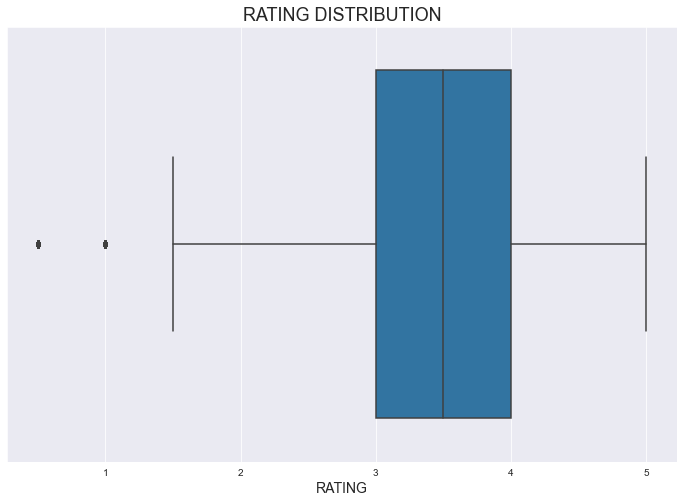

In [15]:
#visually check for outliers in the 'ratings' column
plt.figure(figsize=(12,8))
sns.boxplot(x=data['rating'])
plt.title('RATING DISTRIBUTION', fontsize=18)
plt.xlabel('RATING', fontsize= 14)
plt.show()

Visualized the outliers with a box plot. As seen, there are some points outside the boxplot's whsikers.

In [16]:
# confirm the outliers with the interquartile range method
Q1 = data['rating'].quantile(0.25)
Q3 = data['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# check for outliers; values outside the expected range or rare values
outliers = data[(data['rating'] < lower_bound) | (data['rating'] > upper_bound)]
print(outliers)

        userId  movieId  rating   timestamp  \
205          1     3176     1.0   964983504   
261          3       31     0.5  1306463578   
262          3      527     0.5  1306464275   
263          3      647     0.5  1306463619   
264          3      688     0.5  1306464228   
...        ...      ...     ...         ...   
100374     610    68319     1.0  1493845505   
100415     610    72424     0.5  1493849030   
100426     610    74075     1.0  1493848880   
100734     610   120635     1.0  1493850489   
100797     610   145951     0.5  1493849019   

                                     title                       genres  
205        Talented Mr. Ripley, The (1999)       Drama|Mystery|Thriller  
261                 Dangerous Minds (1995)                        Drama  
262                Schindler's List (1993)                    Drama|War  
263              Courage Under Fire (1996)       Action|Crime|Drama|War  
264            Operation Dumbo Drop (1995)  Action|Adventure|Come

#### DEALING WITH OUTLIERS IN 'ratings' COLUMN

Since the boxplot uses the IQR method to identify potential outliers, it classified some values as outliers even if they're **valid and within the expected range** of the data. This is because ratings like 0.5 and 1, although valid, occured **infrequently or rarely compared to the rest of the ratings**. As seen in the statistical summary, most ratings cluster around higher values like 3, 4, or 5. Therefore, the lower ratings like 0.5 or 1 fell outside the lower whisker and thus were flagged as outliers.

The statistical summary approach simply showed the range of values (minimum and maximum). And as seen earlier, the summary indicated that all ratings fall within the exepected range. This approach doesn't determine whether a value is "unusual" or "rare", it only identified the absolute boundaries.


**In this case being flagged as an outlier doesn't mean the value is incorrect; it means it's unusual/rare compared to the rest of the data**. In the context of these ratings, low values like 0.5 or 1 just indicate genuine low ratings from users.

**For this reason, these outliers are not removed from the dataset or 'dealt with'. They're left as is.**

#### DEALING WITH OUTLIERS IN THE 'userId & movieId' COLUMNS

Outliers in userId could represent users with very few or very many ratings while outliers in movieId could represent movies with very few or very many ratings.

Excluding users or movies with minimal activity levels was considered since these entries contribute limited(sparse) information to the model, and their inclusion can significantly impact the model's behavior.

However, excluding minimal activity entries would result in loss of data which could lead to biased recommendations by focusing solely on **highly active users and popular movies**.

Also, since movies with minimal ratings often belong to niche genres or categories, we decided that retaining them allows the recommendation system to cater to diverse preferences and not just the most popular content.


The model will be trained to handle sparse data effectively, ensuring that recommendations for such entries are meaningful.
Evaluation metrics will also be used to validate that the model performs well across all user and movie activity levels, including those with minimal activity.

#### OUTLIERS IN THE 'timestamp' COLUMN
Outliers in this column could mean timestamps that are far removed from the majority of the data (e.g., years far in the past or future).

From the dataset text description, timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970. We analyzed these datetime values for potential outliers. Then, to make the timestamp column more readable and interpretable, we converted the UNIX timestamps into human-readable datetime values.  

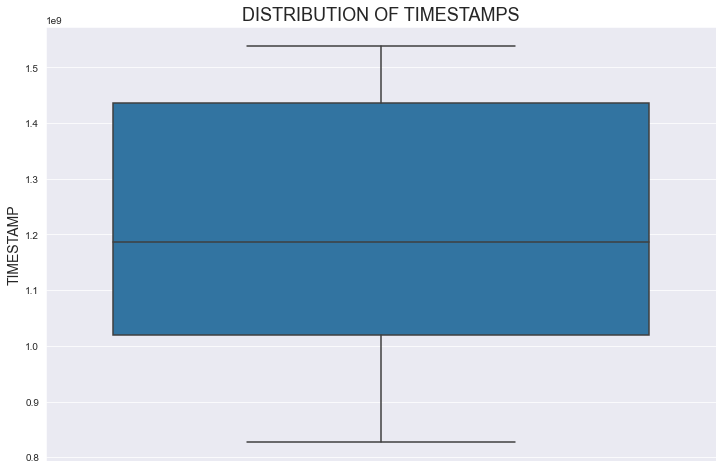

In [17]:
#visualize the distribution of timestamps to visually check for outliers
plt.figure(figsize=(12,8))
sns.boxplot(y=data['timestamp'])
plt.title('DISTRIBUTION OF TIMESTAMPS', fontsize= 18)
plt.ylabel('TIMESTAMP', fontsize= 14)
plt.show()

In [18]:
#earliest vs latest dates
print(f"Earliest timestamp: {data['timestamp'].min()}")
print(f"Latest timestamp: {data['timestamp'].max()}")

Earliest timestamp: 828124615
Latest timestamp: 1537799250


From the boxplot above, we observed that there are no outliers in the timestamp columns

In [19]:
#convert the 'timestamp' column to datetime format instead of a large integer, making it more understandable
#unit='s' indicates that the timestamp is in seconds
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

#print the first few rows to verify the conversion
print(data[['timestamp']].head())

            timestamp
0 2000-07-30 18:45:03
1 2000-07-30 18:20:47
2 2000-07-30 18:37:04
3 2000-07-30 19:03:35
4 2000-07-30 18:48:51


In [20]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


## DATA ANALYSIS (EDA) & VISUALIZATION

This section contains the Exploratory Data Analysis (EDA) conducted on the dataset to gain deeper insights into the available information. The analysis includes a thorough examination of the data to understand trends and relationships.

Various visualizations are utilized to summarize findings, identify patterns, and provide a clearer understanding of the dataset, which will aid in building an effective movie recommendation system.

In [21]:
# Briefly explore the data again before beginning EDA
data.head(20)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,70,3.0,2000-07-30 18:40:00,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,1,101,5.0,2000-07-30 18:14:28,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,1,110,4.0,2000-07-30 18:36:16,Braveheart (1995),Action|Drama|War
8,1,151,5.0,2000-07-30 19:07:21,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,2000-07-30 19:08:20,Canadian Bacon (1995),Comedy|War


In [22]:
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
 4   title      100836 non-null  object        
 5   genres     100836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


### DISTRIBUTION OF RATINGS

Here, we'll investigate how ratings are distributed across the dataset to identify trends like whether users tend to give higher or lower ratings.

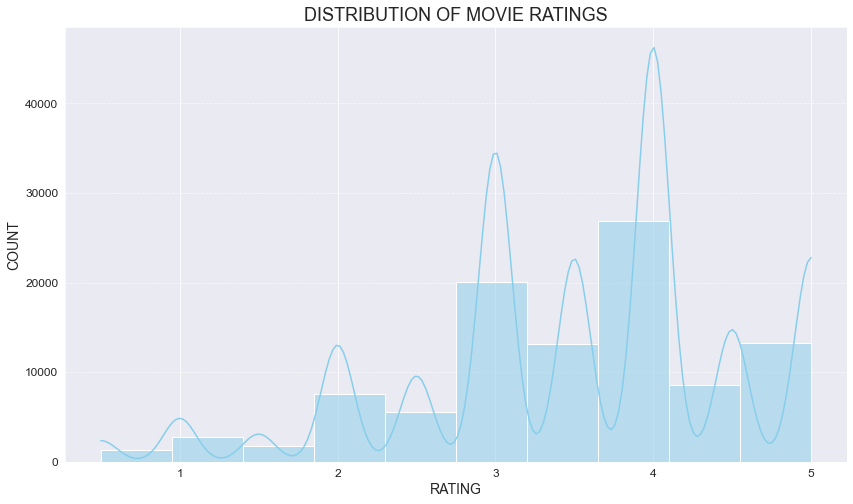

In [24]:
# Plot the distribution of ratings
plt.figure(figsize=(14, 8))
sns.histplot(data['rating'], bins=10, kde=True, color='skyblue')
plt.title('DISTRIBUTION OF MOVIE RATINGS', fontsize=18)
plt.xlabel('RATING', fontsize=14)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Observation

From the plot above we can observe the highest peaks are at rating 3 and 4 and very low at rating point 1 and 2. The distribution of movie ratings reveals that users tend to give moderate to positive ratings, indicating a tendency towards average or slightly favorable reviews rather than extreme opinions of say 1 and 5.

### GENRE POPULARITY ANALYSIS

In this section, we'll examine which genres receive the most ratings as well as the highest average ratings to understand audience preferences.

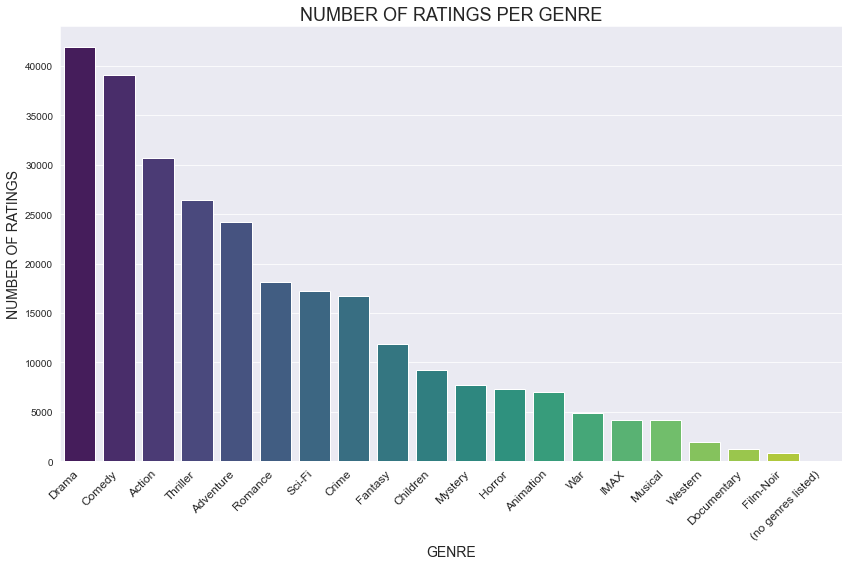

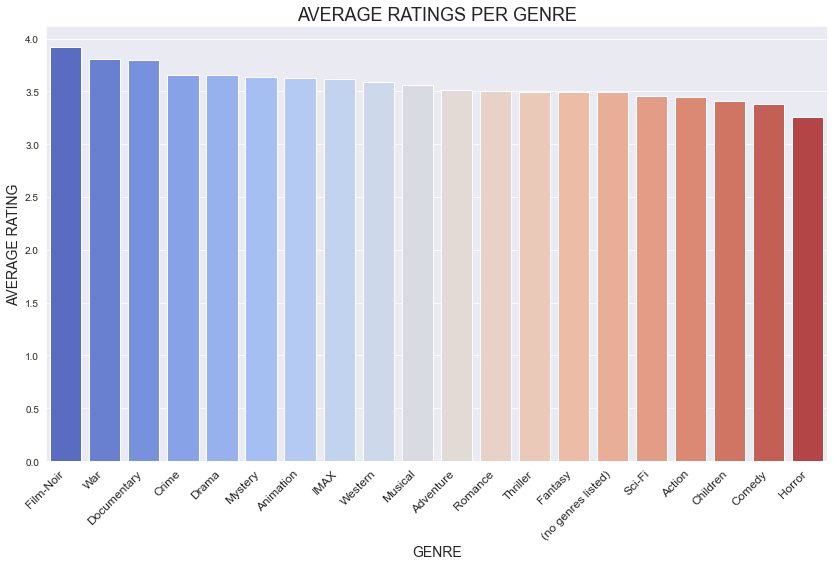

In [25]:
#split the genres and explode them for better analysis since most movies fall in more than one genre
data['genres'] = data['genres'].str.split('|')
exploded_genres = data.explode('genres')

#count the number of ratings per genre
genre_counts = exploded_genres['genres'].value_counts()

#calculate average rating per genre
genre_avg_ratings = exploded_genres.groupby('genres')['rating'].mean().sort_values(ascending=False)

#visualize the number of ratings per genre
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('NUMBER OF RATINGS PER GENRE', fontsize=18)
plt.xlabel('GENRE', fontsize=14)
plt.ylabel('NUMBER OF RATINGS', fontsize=14)
plt.show()

#the average ratings per genre
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_avg_ratings.index, y=genre_avg_ratings.values, palette="coolwarm")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('AVERAGE RATINGS PER GENRE', fontsize=18)
plt.xlabel('GENRE', fontsize=14)
plt.ylabel('AVERAGE RATING', fontsize=14)
plt.show()

#### Observation

The first plot shows the number of ratings across different movie genres, with some genres receiving significantly higher **engagement** than others. As observed, genres like drama, comedy action, thriller, and adventure are the most-rated genres while genres like film-noir, musicals, dicumentary, and western are some of the least-rated genres. 


The second plot highlights the average rating for each genre, showing **variations in user satisfaction**. As observed above, despite being among the least-rated genres, film-noir received the highest average rating, followed closely by war and documentary genres.

Genres such as Drama and Comedy tend to receive the highest number of ratings, indicating their widespread **popularity**. However, genres with **fewer ratings** may still have **higher average ratings**, suggesting a **niche but satisfied audience**.

### MOST-RATED AND TOP-RATED MOVIES

In this section we'll identify movies with the highest average ratings and those with the most ratings to determine popular movies. We'll also see whether the results here will be consistent with the analysis of genre popularity

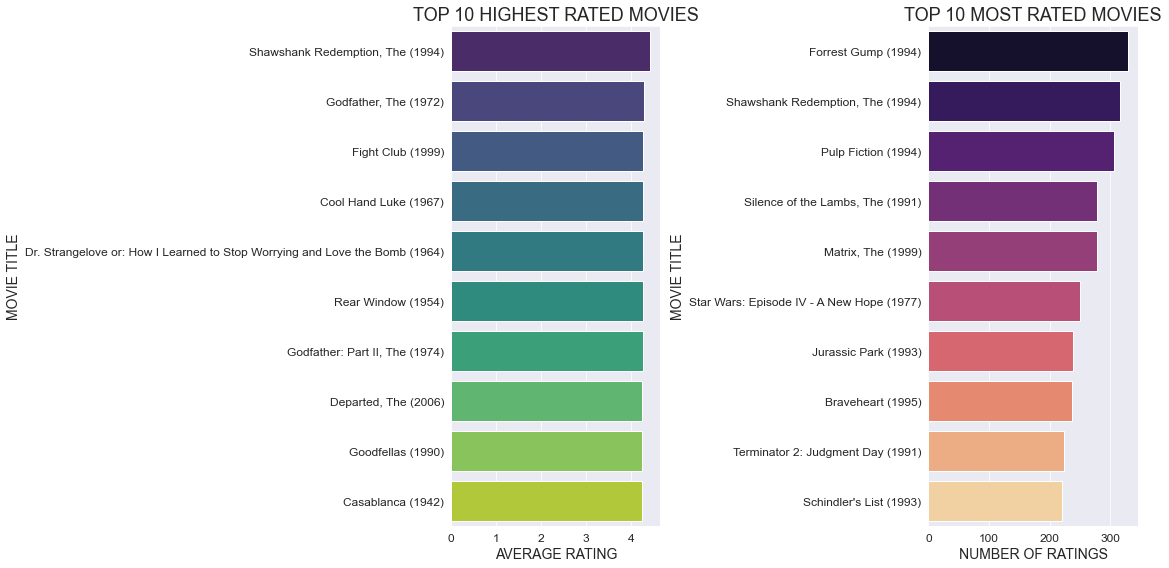

In [26]:
#calculate the number of ratings and average rating per movie
top_rated_movies = data.groupby('movieId').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

#merge with movie titles
top_rated_movies = top_rated_movies.merge(data[['movieId', 'title']].drop_duplicates(), on='movieId', how='left')

#top 10 highest-rated movies (with at least 50 ratings for reliability)
highest_rated = top_rated_movies[top_rated_movies['rating_count'] >= 50].nlargest(10, 'average_rating')

#top 10 most-rated movies
most_rated = top_rated_movies.nlargest(10, 'rating_count')

#Plot
plt.figure(figsize=(16, 8))

#top-rated movies
plt.subplot(1, 2, 1)
sns.barplot(x='average_rating', y='title', data=highest_rated, palette='viridis')
plt.title('TOP 10 HIGHEST RATED MOVIES', fontsize=18)
plt.xlabel('AVERAGE RATING', fontsize=14)
plt.ylabel('MOVIE TITLE', fontsize=14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)


#most-rated movies
plt.subplot(1, 2, 2)
sns.barplot(x='rating_count', y='title', data=most_rated, palette='magma')
plt.title('TOP 10 MOST RATED MOVIES', fontsize=18)
plt.xlabel('NUMBER OF RATINGS', fontsize=14)
plt.ylabel('MOVIE TITLE', fontsize=14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.tight_layout()
plt.show()

#### Observation

The visualization reveals that certain movies have received significantly higher average ratings, with **the highest-rated movies having an average rating above 4.5**. However, as observed in the plots above, these movies might have a lower **number of ratings** overall. As mentioned earlier, this might indicate a **niche but satisfied audience**. 

On the other hand, the **most-rated** movies suggest broader audience engagement, indicating their widespread popularity but with slightly lower average ratings.

Movies like The Shawshank Redemption(1994) appear both in the top-rated and most-rated list suggesting a very popular movie that was also did well. 

### RATING TRENDS OVERTIME

In this section, we'll visualize the ratings trends over time to investigate how ratings have changed over the years.

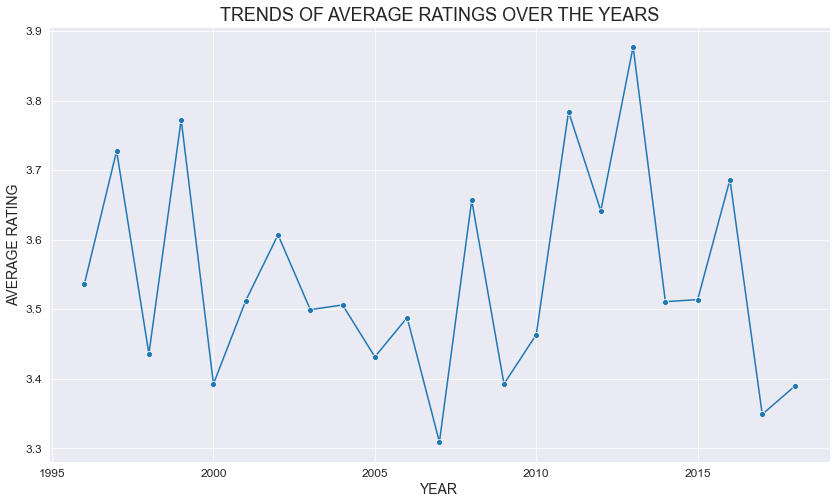

In [27]:
#get the year only from the datetime
data['year'] = pd.to_datetime(data['timestamp'], unit='s').dt.year

#calculate average rating per year
yearly_ratings = data.groupby('year')['rating'].mean().reset_index()

#visualize the trend of average ratings over the years
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='rating', data=yearly_ratings, marker='o')
plt.title('TRENDS OF AVERAGE RATINGS OVER THE YEARS', fontsize=18)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('AVERAGE RATING', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

#### Observation

From the visualization above, we can observe that the avearge rating of movies has **fluctuated** over the years with a noticeable decline around the years 2006-2007. This fluctuations could **potentially be influenced by factors such as changes in user preferences or movie quality over time, or other factors such as the rise of social media**.

### CORRELATION ANALYSIS BETWEEN USER ACTIVITY AND RATINGS

In this section, we'll check if highly active users tend to rate movies differently compared to less active users.

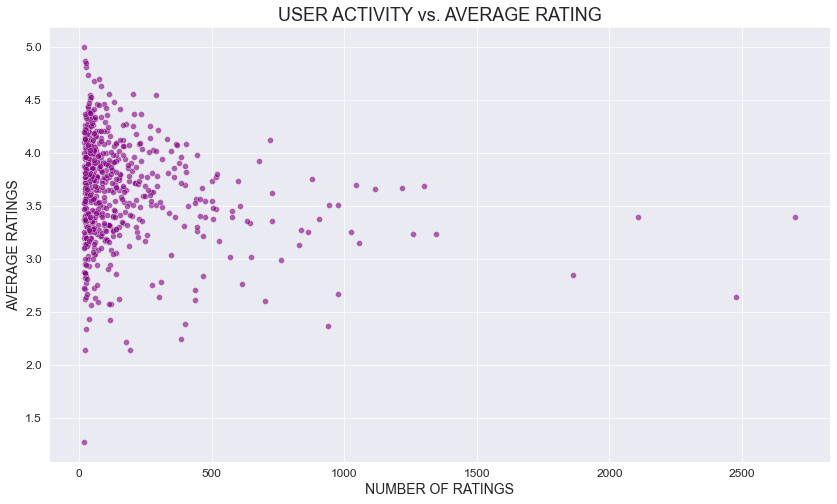

In [28]:
#calculate the number of ratings per user and their average rating
user_activity = data.groupby('userId').agg(
    num_ratings=('rating', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()



#plot a scatter plot of number of ratings vs. average rating
plt.figure(figsize=(14, 8))
sns.scatterplot(x=user_activity['num_ratings'], y=user_activity['avg_rating'], alpha=0.6, color='purple')
plt.title('USER ACTIVITY vs. AVERAGE RATING', fontsize=18)
plt.xlabel('NUMBER OF RATINGS', fontsize=14)
plt.ylabel('AVERAGE RATINGS', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

#### Observation

The scatter plot above suggests that users who provide more ratings **(more active users)** tend to have **average ratings within a specific range**, whereas less active users show more variability in their ratings. Highly active users might have more consistent preferences compared to sporadic users.

### COLD-START PROBLEM INVESTIGATION

Here, we investigated new users or movies with very few ratings, which could impact the effectiveness of recommendations.

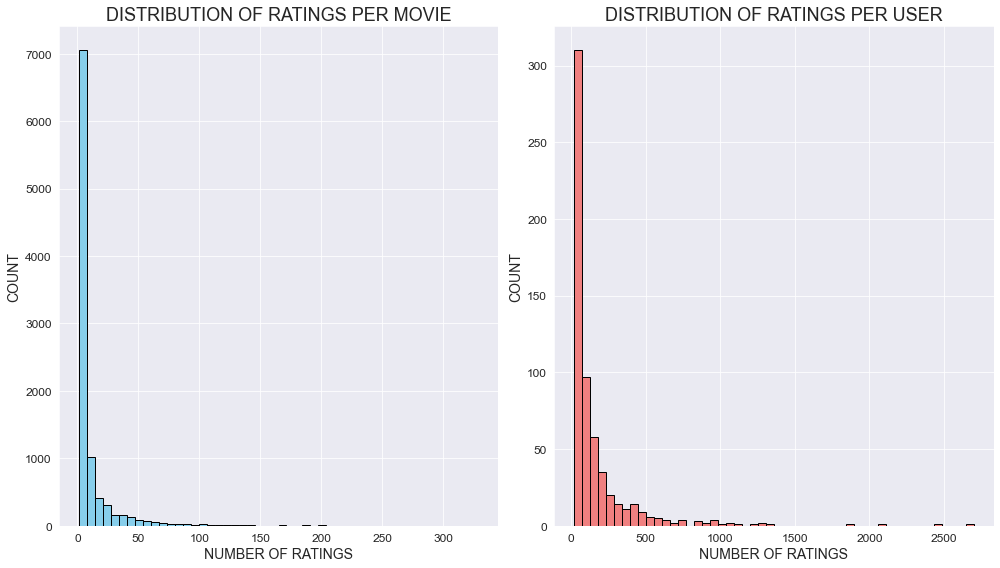

In [29]:
plt.figure(figsize=(14, 8))

#plot a histogram for number of ratings per movie
plt.subplot(1, 2, 1)
data['movieId'].value_counts().plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('DISTRIBUTION OF RATINGS PER MOVIE', fontsize=18)
plt.xlabel('NUMBER OF RATINGS', fontsize=14)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#hist. for number of ratings per user
plt.subplot(1, 2, 2)
data['userId'].value_counts().plot(kind='hist', bins=50, color='lightcoral', edgecolor='black')
plt.title('DISTRIBUTION OF RATINGS PER USER', fontsize=18)
plt.xlabel('NUMBER OF RATINGS', fontsize=14)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

#### Observation

The distributions above suggest that a significant number of movies and users have very few ratings, **indicating a potential cold start problem**. A few popular movies receive most of the ratings, while many have very few ratings, which could limit recommendation accuracy for new items or users.

### USER-MOVIE INTERACTION MATRIX ANALYSIS
Here, we visualised sparcity in ratings

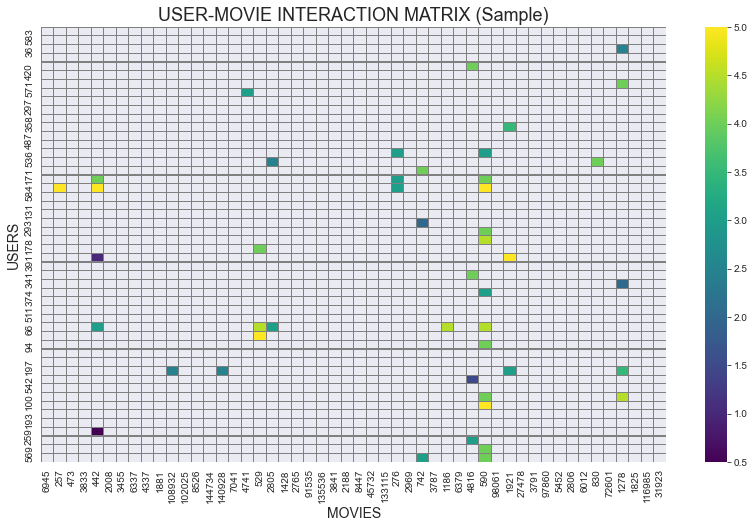

In [30]:
import random

#get a subset of users and movies to visualize
sample_users = random.sample(list(data['userId'].unique()), 50)
sample_movies = random.sample(list(data['movieId'].unique()), 50)

#filter data to get the subset of user-movie interactions
interaction_matrix = data.pivot_table(index='userId', columns='movieId', values='rating')
interaction_sample = interaction_matrix.loc[sample_users, sample_movies]

#plot a heatmap to visualize sparsity
plt.figure(figsize=(14, 8))
sns.heatmap(interaction_sample, cmap='viridis', cbar=True, linecolor='gray', linewidths=0.1)
plt.title('USER-MOVIE INTERACTION MATRIX (Sample)', fontsize=18)
plt.xlabel('MOVIES', fontsize=14)
plt.ylabel('USERS', fontsize=14)
plt.show()

#### Observation

The visualization above demonstrates that the user-movie interaction matrix is **highly sparse**, with most cells having missing values (no rating). This sparsity indicates that users rate only a small fraction of available movies, which is typical in such a dataset.

### SUMMARY FINDINGS IN EDA AND DATA ANALYSIS

Based on the analysis conducted on the MovieLens dataset, the following are the key insights that can help the stakeholders improve recommendation strategies and business overall:

- **Majority of the artings cluster around 3 and 4**: The distribution of ratings shows that most users tend to rate movies with a score of 3 or 4. With this insight, stakeholders can focus on movies that consistently receive ratings above 4 for promotional efforts and personalized recommendations.


- **Certain genres dominate user preferences**: Popular genres such as Drama, Comedy, and Action receive the highest number of ratings, showing they align with audience interests. Therefore, these genres can be prioritized in marketing campaigns, and content acquisition can focus on similar genres to boost engagement.


- **Highly active users provide more stable ratings**: Analysis showed that users with higher activity levels tend to rate movies more consistently, whereas less active users show greater variability. With this insight, stakeholders can consider loyal and active users segmentation for premium recommendation services or loyalty rewards.


- **Fluctuating trends in ratings over the years**: The number of ratings fluctuates over time, with notable increases during specific years, possibly due to platform growth or popular movie releases. Understanding peak activity periods can help the stakeholders plan marketing campaigns or feature releases during high-engagement times.


- **Most-rated movies vs. highest-rated movies differ**: Some of the most frequently rated movies don't necessarily have the highest average ratings, indicating that **popularity does not always align with quality**. Stakeholders should differentiate between "popular" and "high-quality" movies when curating recommendations for users.


- **Variation in ratings across different genres**: Some genres, such as Documentary and Film-Noir, tend to receive higher average ratings but have fewer overall ratings compared to mainstream genres. Promoting niche genres with high satisfaction rates can attract dedicated audiences and differentiate content offerings.

## DATA PREPROCESSING FOR MODELING

In [31]:
# Importing the libraries needed for this section
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # For scaling/normalization
from sklearn.preprocessing import LabelEncoder  #For encoding categorical columns
from sklearn.model_selection import train_test_split  # For splitting datasets
from surprise import Dataset, Reader  # For preparing data for recommendation algorithms
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from surprise import SVD
from surprise import accuracy

# Modeling Stage
from surprise import SVD, KNNBasic, KNNWithMeans, KNNBaseline  # Various collaborative filtering models
from surprise.model_selection import GridSearchCV  # For hyperparameter tuning
from surprise.model_selection import cross_validate  # For model evaluation
from surprise.model_selection import RandomizedSearchCV
from surprise import dump  # For saving and loading models


# Evaluation Stage
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For evaluation metrics
from math import sqrt  # To calculate RMSE

### PREPROCESSING SUMMARY

Based on our goal -- to recommend the top 5 movies a user is likely to enjoy based on their ratings of other movies, we decided to build a Collaborative Filtering recommendation system. This algorithm recommends movies based on user-item interactions, in our case, ratings. The algorithm finds patterns in how users rate movies and recommends based on similar user behavior.


In this section, we'll preprocess data for Collaborative Filtering to prepare the dataset to be in a format suitable for model training. 

- **Handling missing values**: From our EDA, the dataset has no missing values.


- **Handling duplicates**: Since we also confirmed there are no duplicate rows, we don't need to remove any.


- **Dropping Unnecessary columns**: 

We retained the userId, movieId, and rating columns for the model training. Columns like title, genres, timestamp and year were dropped.

Even though userId and movieId are identifiers, they're essential for collaborative filtering models since they linking users and movies. The recommendation system needs a way to uniquely identify and link users to the movies they've rated and these IDs act as keys to map these interactions accurately. For this reason, the Id columns were retained.

Since the focus is general recommendations without **time sensitivity**, we dropped the timestamp and year columns. If required later, we can analyze it separately.


- **Encoding**:

The userId and movieId columns are already numeric (int64 format), so technically, encoding isn’t required. However, encoding was performed to ensure the IDs are consecutive integers (starting from 0). This is because the intended algorithm works faster and more efficiently when IDs are sequentially indexed rather than random large numbers. Encoding was done to also avoid compatibility issues. The original ID columns were retained for better interpretability, but the encoded columns were used internally for modeling.


- **Normalizing/scaling the ratings**: 

With the Surprise's SVD library's ability to handle scaling automatically and ratings being already numerical and bounded within a known range (0-5), additional scaling was unnecessary.


- **User-Movie Interaction Matrix Analysis**:

We created a user-item interaction matrix since the algorithm relies on comparing users with similar rating patterns or finding patterns between items. The matrix was plotted and as expected there were missing ratings. Our approach was to leave the missing values as is since the algorithm can naturally handle missing values and infer them during training.




Here's a brief summary of the preprocessing done in the following cells;

**Summary of the Preprocessing Steps**

- Split data for model training and evaluation.
- Check for missing values and duplicates.
- Drop unnecessary columns (title, genres, timestamp, year).
- Encode categorical columns (userId, movieId).
- Create a user-item interaction matrix to prepare for collaborative filtering.
- Converte data into matrix format for model input.

In [32]:
#create a copy of the data to avoid making changes to the original dataset
data2= data.copy()

In [33]:
data2.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",2000
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),"[Comedy, Romance]",2000
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),"[Action, Crime, Thriller]",2000
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",2000
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",2000


### SPLITTING DATA BEFORE PREPROCESSING & MODELING

Before preprocessing, we split the data to ensure preprocessing and any other changes are made only on the training set. This is to ensure the test set remains untouched, serving as a true representation of unseen data.


Later, the test set will passed through the preprocessing pipeline. This approach also works to prevent data leakage.

In [34]:
# Split before any preprocessing (80% train, 20% test)
train_data, test_data = train_test_split(data2, test_size=0.2, random_state=42)

### PREPROCESSING PIPELINE

In [35]:
#drop unnecessary columns
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns  #storing the dropped columns

    def fit(self, X, y=None):
        return self  #no fitting, just return self

    def transform(self, X):
        return X.drop(columns=self.columns, errors='ignore') #drop the specified columns

    
    
#encoding the userId and movieId columns
class EncodeIDs(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.user_encoder = LabelEncoder()  #Initialize LabelEncoder for userId
        self.movie_encoder = LabelEncoder()   #Initialize LabelEncoder for movieId

    def fit(self, X, y=None):
        self.user_encoder.fit(X['userId'])   #Fit encoder on userId
        self.movie_encoder.fit(X['movieId'])  #Fit encoder on movieId
        return self     #return the fitted instance

    def transform(self, X):
        X = X.copy()
        X['userId_enc'] = X['userId'].apply(lambda x: self.user_encoder.transform([x])[0] if x in self.user_encoder.classes_ else -1)
        X['movieId_enc'] = X['movieId'].apply(lambda x: self.movie_encoder.transform([x])[0] if x in self.movie_encoder.classes_ else -1)
        return X[['userId_enc', 'movieId_enc', 'rating']]  # Keep only necessary columns

    
#creating a user-movie interaction matrix
class InteractionMatrix(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self   #nothing to fit

    def transform(self, X):
        interaction_matrix = X.pivot_table(index='userId_enc', columns='movieId_enc', values='rating')
        return interaction_matrix    #return the matrix

In [36]:
#define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('drop_columns', DropColumns(columns=['title', 'genre', 'timestamp', 'year'])), #columns to be dropped
    ('encode_ids', EncodeIDs()),  #encode user and movie id columns
    ('interaction_matrix', InteractionMatrix())  #create the interaction matrix
])

In [37]:
#apply the pipeline to the training data
matrix_train = preprocessing_pipeline.fit_transform(train_data)

#check the processed interaction matrix
print(matrix_train.shape)  # To see the matrix dimensions
print(matrix_train.head())  # Preview the top rows

(610, 8983)
movieId_enc  0     1     2     3     4     5     6     7     8     9     ...  \
userId_enc                                                               ...   
0             4.0   NaN   4.0   NaN   NaN   4.0   NaN   NaN   NaN   NaN  ...   
1             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

movieId_enc  8973  8974  8975  8976  8977  8978  8979  8980  8981  8982  
userId_enc                                                               
0             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3             NaN   NaN   NaN   NaN   NaN   NaN   NaN   N

Below, we apply the preprocessing pipeline to the test set. We apply only the transformations to the test data without fitting.

In [38]:
#transform the test set using the trained pipeline (without fitting)
matrix_test = preprocessing_pipeline.transform(test_data)

#check the processed test set matrix
print(matrix_test.shape)
print(matrix_test.head())

(610, 4402)
movieId_enc  -1      0      1      2      3      4      5      6      7     \
userId_enc                                                                   
0              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2              4.5    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3              2.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4              NaN    4.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

movieId_enc   8     ...   8898   8900   8904   8907   8909   8917   8930  \
userId_enc          ...                                                    
0              NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1              NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2              NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3              NaN  ...    NaN    NaN    NaN    NaN    NaN   

## MODELING & EVALUATION

To begin modeling, we converted the processed data to Surprise's required format.

In [39]:
#define the rating scale based on the dataset
reader = Reader(rating_scale=(0, 5))

#convert the interaction matrices back to DataFrame for Surprise
matrix_train = matrix_train.stack().reset_index()
matrix_train.columns = ['userId_enc', 'movieId_enc', 'rating']

matrix_test = matrix_test.stack().reset_index()
matrix_test.columns = ['userId_enc', 'movieId_enc', 'rating']

#load into Surprise dataset format
trainset = Dataset.load_from_df(matrix_train[['userId_enc', 'movieId_enc', 'rating']], reader).build_full_trainset()
testset = Dataset.load_from_df(matrix_test[['userId_enc', 'movieId_enc', 'rating']], reader)

### BASELINE MODEL

In [40]:
testset = list(matrix_test.itertuples(index=False, name=None))

In [42]:
#initialize and train the SVD model(this is our baseline)
model = SVD()   
model.fit(trainset)   #trains the SVD model on the trainset


#predictions on the test set
predictions = model.test(testset)   #the tuples of the test set prepared above


#evaluate the model performance
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"Baseline RMSE: {rmse}")
print(f"Baseline MAE: {mae}")

RMSE: 0.8855
MAE:  0.6768
Baseline RMSE: 0.8854999286817727
Baseline MAE: 0.6768416189880477


A **lower RMSE** value means better performance because it indicates **smaller differences between predicted and actual ratings**.
In this case, an RMSE of 0.8855 means that the predicted movie ratings deviate from the actual ratings by around 0.88 rating points, considering squared errors.

Since the movie ratings  range from 0 to 5, an RMSE of 0.88 means the model is doing a **reasonable** job but still **has some room for improvement**. If the RMSE were closer to 0, it would mean near-perfect predictions. Values above 1 would indicate higher deviations, meaning less accuracy.


An MAE of 0.6768 means that, on average, the model's predictions are **off by around 0.67 rating points** from the actual ratings. Lower values indicate better model accuracy. In this case, an MAE of 0.67 suggests the model is **fairly accurate but still can be improved** to minimize prediction errors further.


Overall the model is performing fairly well, with prediction errors under 1 and while the initial results are decent, there's room for improvement through hyperparameter tuning and optimization.

### OPTIMIZATION I
In this setion, we'll optimize the SVD model's performance by tuning its hyperparameters using **GridSearchCV**.

In [43]:
#define the parameter grid
param_grid = {
    'n_factors': [5, 10, 15],   #no. of latent features.
    'n_epochs': [2, 5, 10],   #no. of iterations during training.
    'lr_all': [0.002, 0.005, 0.01], #learning rate for all parameters.
    'reg_all': [0.02, 0.1, 0.2]   #regularization term to prevent overfitting.
}

#initialize GridSearchCV
#test different combos of the parameters and select the best-performing one based on the evaluation metrics.
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

#fit on the training set
#train multiple SVD models with different combinations of hyperparameters and evaluates them.
grid_search.fit(Dataset.load_from_df(matrix_train[['userId_enc', 'movieId_enc', 'rating']], reader))

#best parameters and scores
best_params = grid_search.best_params['rmse']   #retrieves the hyperparameter combination that achieved the lowest RMSE.
best_score = grid_search.best_score['rmse']   #retrieves the best (lowest) RMSE score from all tested combinations.

print(f"Best RMSE Parameters: {best_params}")
print(f"Best RMSE Score: {best_score}")

Best RMSE Parameters: {'n_factors': 5, 'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.02}
Best RMSE Score: 0.8795363842060014


**Interpretating our first optimization step.**

- **n_factors: 5** → The best model uses 5 latent features to represent user and movie relationships.

- **n_epochs: 10** → The model performs best when trained for 10 iterations.

- **lr_all: 0.01** → The best learning rate for all parameters is 0.01.

- **reg_all: 0.02** → The best regularization term to prevent overfitting is 0.02.


The **best RMSE score obtained during cross-validation is 0.8795**, meaning that the model's average prediction error is 0.87 rating points away from the actual ratings in the training data.

Here, we train the model using the best hyperparameters we found above.

In [44]:
#extract the best hyperparameters from the grid search
best_model_params = grid_search.best_params['rmse']

#initialize the SVD model with the best hyperparameters
opt1_model = SVD(n_factors=best_model_params['n_factors'], 
                  n_epochs=best_model_params['n_epochs'], 
                  lr_all=best_model_params['lr_all'], 
                  reg_all=best_model_params['reg_all'])

#train the final model on the entire training set
opt1_model.fit(trainset)

In [45]:
#predict on the test set using the trained model
opt1_predictions = opt1_model.test(testset)

#evaluate the model performance on the test set
opt1_rmse = accuracy.rmse(opt1_predictions)
opt1_mae = accuracy.mae(opt1_predictions)

print(f"Optimization I RMSE: {opt1_rmse}")
print(f"Optimization I MAE: {opt1_mae}")

RMSE: 0.8911
MAE:  0.6796
Optimization I RMSE: 0.8910951022741277
Optimization I MAE: 0.6796376338220568


The RMSE of the tuned model is **slightly higher (0.8911) than the baseline RMSE (0.8855)**, meaning the tuned model's predictions have slightly larger errors compared to the baseline. Ideally, RMSE should be lower after tuning, indicating better performance, but in this case, the increase suggests that tuning didn't improve the model as expected and **may have led to overfitting**.

Additionally, the tuned model's MAE (0.6796) is slightly higher than the baseline (0.6768), indicating that the absolute prediction error has also increased. With this MAE being close to the baseline value means the model isn't significantly worse, but it also doesn't show improvement.

**Therefore, in this case, tuning with GridSearchCV didn't improve our model since the tuned model performed slightly worse than the baseline model, which suggests that the original hyperparameters might have been closer to optimal, or the tuning process overfit the training data**.

So, below we'll try a different tuning approach

### OPTIMIZATION II
Trying a Different Parameter Tuning Approach - using RandomizedSearchCV.

In [46]:
#define parameters
param_dist = {
    'n_factors': [10, 20, 50],
    'n_epochs': [10, 20],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.05, 0.1]
}

#initialize and run RandomizedSearchCV
random_search = RandomizedSearchCV(SVD, param_dist, n_iter=10, measures=['rmse', 'mae'], cv=3, n_jobs=-1, random_state=42)
random_search.fit(Dataset.load_from_df(matrix_train[['userId_enc', 'movieId_enc', 'rating']], reader))

#print best parameters
print("Best RMSE Params:", random_search.best_params['rmse'])
print("Best RMSE Score:", random_search.best_score['rmse'])

Best RMSE Params: {'n_factors': 10, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}
Best RMSE Score: 0.8761547524492181


In [47]:
#extract the best parameters from RandomizedSearchCV
best_params = random_search.best_params['rmse']

#initialize the SVD model with the best parameters
opt2_model = SVD(
    n_factors=best_params['n_factors'],
    n_epochs=best_params['n_epochs'],
    lr_all=best_params['lr_all'],
    reg_all=best_params['reg_all']
)

#erain the mode
opt2_model.fit(trainset)

#make predictions on the test data
opt2_predictions = opt2_model.test(testset)

#evaluate the optimized model's performance
opt2_rmse = accuracy.rmse(opt2_predictions)
opt2_mae = accuracy.mae(opt2_predictions)

print(f"Optimization II RMSE: {opt2_rmse}")
print(f"Optimization II MAE: {opt2_mae}")

RMSE: 0.8838
MAE:  0.6741
Optimization II RMSE: 0.8837715035039327
Optimization II MAE: 0.6741281347847476


The **RMSE** from RandomizedSearchCV is **0.8821**, which is **lower** than the RMSE from GridSearchCV, which was 0.8911.
A lower RMSE indicates that the predictions from the model are closer to the actual ratings on average.

The **MAE** from RandomizedSearchCV is **0.6742**, slightly better than the MAE from GridSearchCV, which was 0.6795. This indicates a smaller average error in absolute terms when using RandomizedSearchCV.

So, there has been **a slight improvement with the parameters found using RandomizedSearchCV compared to those from GridSearchCV**. Both RMSE and MAE are slightly lower, which indicates that the model's predictions are more accurate this time. The small but noticeable improvement suggests that the optimized hyperparameters found by RandomizedSearchCV are better suited for the dataset and task at hand than those found by GridSearchCV.

### PRECISION FOR BOTH OPTIMIZATIONS

In [48]:
#define a threshold for relevant recommendations
threshold = 4.0

def calculate_precision(predictions, threshold):
    #count true positives (relevant recommendations)
    relevant_recommendations = sum((pred.est >= threshold) and (pred.r_ui >= threshold) for pred in predictions)
    
    #count total recommendations made
    total_recommendations = sum(pred.est >= threshold for pred in predictions)
    
    #calculate precision
    precision = relevant_recommendations / total_recommendations if total_recommendations > 0 else 0
    return precision

#precision for first optimization (GridSearchCV)
precision_optimization1 = calculate_precision(opt1_predictions, threshold)

#precision for second optimization (RandomizedSearchCV)
precision_optimization2 = calculate_precision(opt2_predictions, threshold)

#results
print(f"Precision for First Optimization: {precision_optimization1:.4f}")
print(f"Precision for Second Optimization: {precision_optimization2:.4f}")

Precision for First Optimization: 0.8009
Precision for Second Optimization: 0.8130


The threshold for relevant recommendations was set at 4 meaning that we're defining "relevant recommendations" as movies that the system predicts will have a rating of 4 or higher since this score generally indicates that a user liked a movie.Therefore, for each predicted rating, we compare it to this threshold.

So, if the **predicted rating ≥ 4**, we classify it as a recommended movie and if the **true rating ≥ 4** for the same movie, it's considered a **relevant recommendation**.

Precision for the first optimization is 0.8009, meaning that about 80.09% of the movies the **model recommended** (those predicted to have a rating ≥ 4) were actually rated highly by the user (≥ 4). This precision score suggests that the model is doing **fairly well at recommending relevant movies**.

Precision for the second optimization is 0.8130 meaning that about 81.30% of the **recommended movies were actually relevant, which is slightly better than the first optimization**.

This **slight increase of about 0.9% in precision** indicates that the tuning of hyperparameters in the second optimization helped reduce the number of **false positives** (incorrectly recommended movies). While this improvement isn't massive, it's still valuable, especially in recommendation systems, where even a small increase in relevance can make a noticeable difference in user satisfaction.

### GENERATING TOP-5 RECOMMENDED MOVIES

With our optimized model, we generated personalized recommendations for a user sample.

Here, the best hyperparameters from the RandomizedSearchCV were extracted, then we defined a function that takes a user_id, the model, and the trainset, and predicts ratings for all movies in the dataset for the given user. The function then sorts the predicted ratings in descending order and selects the top 5. It finally returns the top 5 movie IDs.

So, a sample user_id is specified and the top-5 recommendations for that specific user are generated using the latest trained optimized model. The recommendations are in terms of movie IDs.

With this fuction, we're able to replace the user_id with any user id inorder to generate personalized recommendations for that user.

In [49]:
#these are the best parameters after running RandomizedSearchCV
best_params = random_search.best_params['rmse']

#print the best parameters and RMSE score
print("Best RMSE Params:", best_params)
print("Best RMSE Score:", random_search.best_score['rmse'])



#use the best parameters from the previous step to create our model.
model = SVD(n_factors=best_params['n_factors'],
            n_epochs=best_params['n_epochs'],
            lr_all=best_params['lr_all'],
            reg_all=best_params['reg_all'], random_state=42)


#train the model on the trainset
model.fit(trainset)


#function that recommends the top 5 movies for a given user based on their ratings
def get_top_5_recommendations(user_id, model, trainset):
    
    #first, get all the movie IDs from the trainset
    all_movie_ids = [iid for iid in trainset.all_items()]  #all_items() to give a list of all movie IDs

    #predict the rating for all movies for the given user
    predictions = []
    for movie_id in all_movie_ids:
        prediction = model.predict(user_id, movie_id)  #predict the rating for this user and movie
        predictions.append(prediction)  #store the prediction in a list

    #sort the predictions to find the movies the user is likely to rate the highest
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)

    #top 5 movies based on the sorted predictions
    top_5_movies = [pred.iid for pred in sorted_predictions[:5]]

    return top_5_movies  #return the list of top 5 movie IDs

# a sample user
sample_user_id = 1

top_5_recommended_movies = get_top_5_recommendations(sample_user_id, model, trainset)

#print the top-5 recommended movies for the sample user
print(f"Top 5 Recommended Movies for User {sample_user_id}: {top_5_recommended_movies}")

Best RMSE Params: {'n_factors': 10, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}
Best RMSE Score: 0.8761547524492181
Top 5 Recommended Movies for User 1: [871, 660, 586, 896, 4673]


From the output above, based on user_id 1's past ratings, we would recommend the listed movie ids and since we have access to the original dataset, we can still be able to find out the movies' title and genre.  

### Note on reproducibility and inconsistencies:

**While efforts have been made throughout this notebook to fix the random seed and ensure reproducibility, slight variations may still occur due to factors like underlying library-specific behavior, which may not guarantee exact reproducibility across all environments. These factors may lead to minor differences in results (like the evaluation scores RMSE and precision) between code output and the markdown, even with the same random seed.**

## CONCLUSION

Based on the analysis and modeling conducted on the MovieLens dataset, we've gained valuable insights into user preferences, rating behaviors, and the effectiveness of recommendation models. Our exploratory data analysis highlighted key patterns in user engagement, genre preferences, and rating distributions. The recommendation system, optimized using collaborative filtering techniques, achieved a promising RMSE score indicating a reasonable level of accuracy. These findings provide actionable strategies to enhance movie recommendations, user experience, and business growth. Future improvements can further optimize the system to address challenges such as cold start problems and evolving user preferences.

## RECOMMENDATIONS

**1. Personalized promotion strategies:**

Focus marketing efforts on movies consistently rated above 4 and promote highly rated niche genres to attract dedicated audiences.


**2. Genre-based content expansion:**

Increase content acquisition and production in high-demand genres like drama, comedy, and action to align with user preferences.


**3. User segmentation for targeted engagement:**

Develop loyalty programs and premium recommendation services for highly active users who provide more stable and valuable feedback.


**4. Peak engagement planning:**

Leverage historical rating trends to schedule content releases and promotions during peak engagement periods to maximize impact.


**5. Differentiated recommendation strategies:**

Offer separate recommendation lists for "popular" and "high-quality" movies to cater to diverse user preferences and expectations.


**6. Cold-start mitigation:**

Introduce content-based filtering or hybrid models to enhance recommendations for new users with limited rating history.

## NEXT STEPS

**- Build a hybrid recommendation model:** Combine collaborative and content-based filtering to improve accuracy and address limitations of individual approaches.


**- Expand feature engineering:** Incorporate additional user and movie features, such as demographics, review text, and browsing history, to enrich the recommendation model.


**- Deploy and monitor the system:** Implement the model in a real-world environment, track its performance over time, and continuously refine it based on user feedback and new data.


**- Collect more data that is also diverse:** Collect additional data to improve the model robustness.